# Exercise: Classification and Clustering with MNIST dataset

## Introduction 

You'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.


## Exercise 1
Follow the instructions to implement the following codes
* Import `datasets` from `sklearn` and `matplotlib.pyplot` as `plt`.

* Load the digits dataset using the `.load_digits()` method on `datasets`.
 
* Print the keys and `DESCR` of digits.

* Print the shape of `images` and `data` keys using the `.` notation.

* Display the 1011th image using `plt.imshow()`. This has been done for you.


In [51]:
# Import necessary modules
import matplotlib.pyplot as plt
from sklearn import datasets

In [52]:
# Load the digits dataset: digits
digits = datasets.load_digits()

In [53]:
# Print the keys and DESCR of the dataset
print(digits.keys())


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [54]:
digits.target.shape

(1797,)

In [55]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [56]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)


(1797, 8, 8)
(1797, 64)


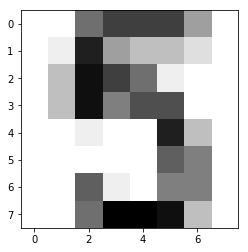

In [57]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Exercise 2
Follow the instructions to implement the following codes
* Import `KNeighborsClassifier` from `sklearn.neighbors` and `train_test_split` from `sklearn.model_selection`.

* Create an array for the features using `digits.data` and an array for the target using `digits.target`.

* Create stratified training and test sets using `0.2` for the size of the test set. Use a random state of `42`. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
 
* Create a k-NN classifier with `7` neighbors and fit it to the training data.

* Compute and print the accuracy of the classifier's predictions using the .score() method.

In [58]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# Create feature and target arrays
X = digits.data
y = digits.target


In [60]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 8, stratify= None)


In [61]:
y_train.shape



(1257,)

In [62]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [63]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Predicted labels: ", y_pred[:30])
print("Ground truth    : ", y_test[:30])

Predicted labels:  [6 8 1 5 0 9 0 1 1 6 7 8 9 9 8 4 7 2 5 3 3 2 4 0 1 3 8 9 7 7]
Ground truth    :  [6 8 1 5 0 9 0 1 1 6 7 8 9 5 8 4 7 2 5 3 3 2 4 0 1 3 8 9 7 7]


In [64]:
# Print the accuracy
from sklearn.metrics import accuracy_score
#print(knn.score(____, ____))

print("7NN accuary score of the test set:", knn.score(X_test,y_test))
print("7NN accuary score of the train set:", knn.score(X_train,y_train))

7NN accuary score of the test set: 0.9907407407407407
7NN accuary score of the train set: 0.9872712808273667


## Exercise 3
Follow the instructions to implement the following codes

* Inside the for loop:
  * Setup a k-NN classifier with the number of neighbors equal to `k`.
  * Fit the classifier with `k` neighbors to the training data.
  * Compute accuracy scores the training set and test set separately using the `.score()` method and assign the results to the `train_accuracy` and `test_accuracy` arrays respectively.

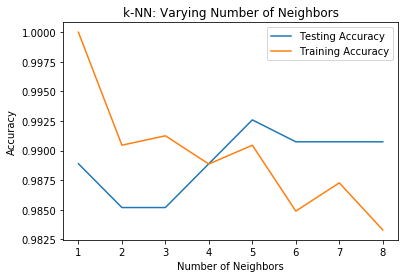

In [65]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## Exercise 4
Follow the instructions to implement the following codes
* Import `GridSearchCV` from `sklearn.model_selection`/ 

* Setup kNN and the hyperparameter grid in range (1,25).

* Use `GridSearchCV` with 5-fold and fit it to the training data.

* Print the best parameter and the best score obtained from `GridSearchCV` by accessing the `best_params_` and `best_score_`.


In [66]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
# Setup Gridsearch and fit to data
knn_cv = GridSearchCV (knn, param_grid, cv = 5)
knn_cv.fit(X_train, y_train)
# Print the best parameter and best score.
print(knn_cv.best_params_)
print(knn_cv.score(X_train, y_train))
print(knn_cv.score(X_test, y_test))

{'n_neighbors': 1}
1.0
0.9888888888888889


## Exercise 5 

* Apply logistic regression, SVM and Decision Tree to the training dataset.
* For each classifier, print out the training and validation accuracy.

In [67]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [68]:
# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression: score of training set", lr.score(X_train, y_train))
print("Logistic Regression: score of training set", lr.score(X_test, y_test))

Logistic Regression: score of training set 0.9976133651551312
Logistic Regression: score of training set 0.9629629629629629


In [69]:
# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print("SVM: score of training set", svm.score(X_train, y_train))
print("SVM: score of training set", svm.score(X_test, y_test))

SVM: score of training set 1.0
SVM: score of training set 0.3851851851851852


In [70]:
# Apply Decision Tree and print scores
tree = DecisionTreeClassifier(max_depth=12)
tree.fit(X_train, y_train)
print("Decision Tree: score of training set", tree.score(X_train, y_train))
print("Decision Tree: score of training set", tree.score(X_test, y_test))

Decision Tree: score of training set 0.9984089101034208
Decision Tree: score of training set 0.8462962962962963


## Exercise 6 
Modify the code [this link](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) to visualize decision boundaries of four classifier types: k-NN, SVM, Logistic Regression, Decision Tree 

In [71]:
import itertools

In [72]:
# Loading some example data
X_ex = X[:, [12,14]]
y_ex = y

In [73]:
# Training classifiers
tree = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC(kernel='rbf', probability=True)
lr = LogisticRegression()


In [74]:
tree.fit(X_ex, y)
knn.fit(X_ex, y)
svc.fit(X_ex, y)
lr.fit(X_ex, y)

# Plotting decision regions
x1_min, x1_max = X_ex[:, 0].min() - 1, X_ex[:, 0].max() + 1
x2_min, x2_max = X_ex[:, 1].min() - 1, X_ex[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), #np.arange(start, stop, step). 
                     np.arange(x2_min, x2_max, 0.1)) #meshgrid dung de tao 2 matran cua cac diem grid

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
# subplot: ve nhieu plot cung mot graph. row = 2, col = 2, sharex, sharey: plot chung toa do x hay y.
# f: 1 fingure
# axarr: chua cac subplot. Neu muon ve chi 1 subplot thi access theo: axarr[0,0] axarr[0,1], axarr[1,0] hoac axarr[1,1]

for idx, clf, tt in zip(itertools.product([0, 1], [0, 1]), #intertools.product cho ra ket hop giua 0 va 1
                        [tree, knn, svc, lr],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Logistic Regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #contour line, boundary line. numpy.ravel: tao ra array 1 dimension
    # numpy.ravel: Return a contiguous flattened array.
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## Exercise 7 
Assume we do not know the labels of the dataset. In this exercise we use k-Means to cluster the dataset with `k=10`. Follow the instructions to implement the following codes

* Import KMeans from `sklearn.cluster`.
* Using `KMeans()`, create a KMeans instance called model to find 10 clusters. To specify the number of clusters, use the `n_clusters'` keyword argument.
* Use the `.fit()` method of model to fit the model to the array of points points.
* Use the `.predict()` method of model to predict the cluster labels of new_points, assigning the result to labels.

In [75]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 10 clusters: model
model = KMeans(n_clusters=10, init='k-means++')


# Fit model to points
model.fit(X)

# Determine the cluster labels of new_points: labels
labels=model.predict(X)
print("Lables of X: ", labels[:20])
print("True value y:", y[:20])




Lables of X:  [8 1 1 6 7 4 2 5 1 4 8 0 3 6 7 9 2 5 1 4]
True value y: [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [76]:
# Pick up 2 random numbers a, b
a = np.array([ 0.,  0.,  9., 12., 12., 12.,  6.,  0.,  0.,  1., 14.,  6.,  4.,
        4.,  2.,  0.,  0.,  4., 16., 15.,  14.,  1.,  0.,  0.,  0.,  4.,
       15.,  8., 15., 11.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 14.,  4.,
        0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0., 10.,  1.,
        0.,  8.,  8.,  0.,  0.,  0.,  9., 16., 16., 15.,  4.,  0.])
b = np. array([ 0.,  0.,  9., 16., 15.,  2.,  0.,  0.,  0.,  0.,  9.,  3.,  9.,
        8.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,
        0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 10., 11., 16.,  2.,
        0.,  0.,  3.,  1.,  0.,  0., 14.,  4.,  0.,  0., 10., 13.,  7.,
        2., 12.,  4.,  0.,  0.,  0.,  7., 13., 14., 10.,  0.,  0.])



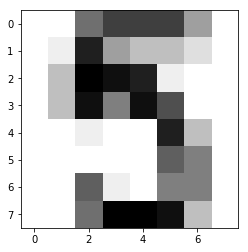

In [77]:
# Display digit a,b

shape = (8,8)
aa = np.reshape(a, (8,8))
ab = np.reshape(b, (8,8))


plt.imshow(aa, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

plt.imshow(ab, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()



In [78]:
sample=[a,b]
y_sample=model.predict(sample)
print("Lables of sample:", y_sample)

Lables of sample: [4 6]


## Exercise 8 

 Compare the clusters in exercise 7 to the labels by using a cross-tabulation `pd.crosstab()`.

In [79]:
import pandas as pd
ct = pd.crosstab(labels,y)
print(ct)

col_0    0   1    2    3    4    5    6    7    8    9
row_0                                                 
0        0  55    3    0    2    0    0    9    9   20
1        0  99    8    7    2    0    3    2  102    1
2        0   2    0    0    0    1  177    0    2    0
3        0  24  147    1    0    0    0    0    3    0
4        0   0    1    9    0   42    0    0   47  139
5        0   0    3    6   11    0    0  168    4    8
6        0   1   14  158    0    1    0    0    3    6
7        1   0    0    0  166    2    0    0    0    0
8      177   0    1    0    0    0    1    0    0    0
9        0   1    0    2    0  136    0    0    4    6
